**Define the necessary libraries** (1 mark)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Load the dataset into the dataframe** (1 mark)

In [2]:
df = pd.read_csv('BigmartSales.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Drop the "Item_Identifier" and "Outlet_Identifier" columns** (1 mark)

In [3]:
df.drop(columns=["Item_Identifier","Outlet_Identifier" ], inplace=True)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


**Extract the target labels** (1 mark)

In [4]:
df['Item_Outlet_Sales']

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

**Replace the field "Item_Fat_Content" with numerical value** (1 mark)

In [5]:
from sklearn.preprocessing import LabelEncoder

# making use of simple labelencoder to convert to numerics
le = LabelEncoder()
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])
df['Item_Fat_Content'].unique()

array([1, 2, 3, 0, 4])

**Perform ordinal encoding of the "Item_Type", "Outlet_Type", "Outlet_Location_Type" and "Outlet_Type" field** (1 mark)

In [6]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
df[["Item_Type","Outlet_Type","Outlet_Location_Type","Outlet_Type"]] = oe.fit_transform(df[["Item_Type","Outlet_Type","Outlet_Location_Type","Outlet_Type"]])
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4.0,249.8092,1999,Medium,0.0,1.0,3735.1380
1,5.920,2,0.019278,14.0,48.2692,2009,Medium,2.0,2.0,443.4228
2,17.500,1,0.016760,10.0,141.6180,1999,Medium,0.0,1.0,2097.2700
3,19.200,2,0.000000,6.0,182.0950,1998,NaN,2.0,0.0,732.3800
4,8.930,1,0.000000,9.0,53.8614,1987,High,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13.0,214.5218,1987,High,2.0,1.0,2778.3834
8519,8.380,2,0.046982,0.0,108.1570,2002,NaN,1.0,1.0,549.2850
8520,10.600,1,0.035186,8.0,85.1224,2004,Small,1.0,1.0,1193.1136
8521,7.210,2,0.145221,13.0,103.1332,2009,Medium,2.0,2.0,1845.5976


**Imputation of "Outlet_Size" field with mode value** (1 mark)

In [7]:
print("nan size before imputation:",df['Outlet_Size'].isnull().sum())
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)
print("nan size before imputation:",df['Outlet_Size'].isnull().sum())

nan size before imputation: 2410
nan size before imputation: 0


**Check for null values** (1 mark)

In [8]:
df.isnull().sum()
# still Item_weight is having 1463 null values

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Imputation of "Item_Weight" field with mode value** (1 mark)

In [9]:
print(df['Item_Weight'].isnull().sum())
df['Item_Weight'].fillna(df['Item_Weight'].mode()[0], inplace=True)
print(df['Item_Weight'].isnull().sum())

1463
0


**Display all field in the dataset using boxplot** (1 mark)

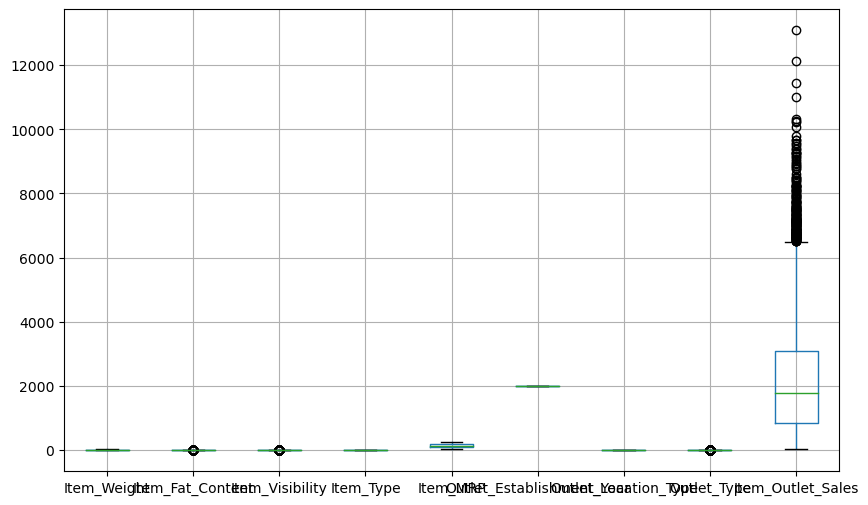

In [10]:
df.boxplot(figsize=(10, 6))
plt.show()

**Split the dataset into train and test(20%), apply Linear Regression and calculate RMSE value** (1 mark)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df[['Outlet_Size']] = oe.fit_transform(df[['Outlet_Size']])

X = df[df.columns.difference(['Item_Outlet_Sales'])]
y = df['Item_Outlet_Sales']


lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)

import numpy as np
# np is required to convert MSE to RMSE
plain_rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"Root Mean Squared Error (RMSE): {plain_rmse}")

Root Mean Squared Error (RMSE): 1237.7867884115033


**Apply StandardScaller and split the dataset into train and test(20%)** (1 mark)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)
scaled_df=pd.DataFrame(scaled_data,columns=df.columns)

X = scaled_df[scaled_df.columns.difference(['Item_Outlet_Sales'])]
y = scaled_df['Item_Outlet_Sales']
    
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

**Display all field in the dataset using boxplot** (1 mark)

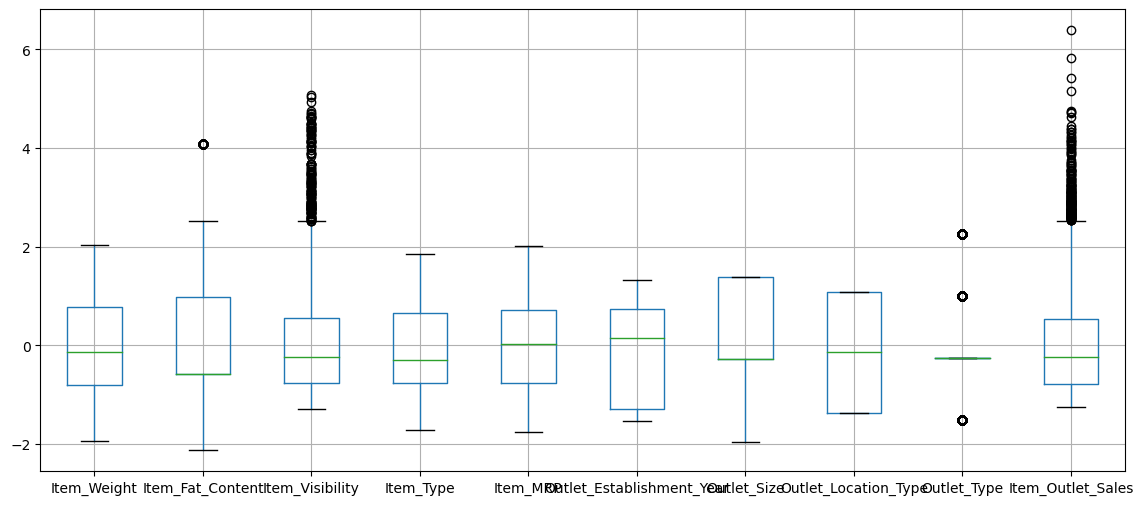

In [14]:
scaled_df.boxplot(figsize=(14, 6))
plt.show()

**Apply Linear Regression and calculate RMSE value** (1 mark)

In [15]:

lr = LinearRegression()

lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)

import numpy as np
# np is required to convert MSE to RMSE
std_rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"Root Mean Squared Error (RMSE): {std_rmse}")

Root Mean Squared Error (RMSE): 0.699341128456553


**Apply MinMaxScaler, split the dataset into train and test(20%), apply LinearRegression and calculate RMSE** (1 mark)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(df)
minmax=pd.DataFrame(scaled_data,columns=df.columns)

X = minmax[minmax.columns.difference(['Item_Outlet_Sales'])]
y = minmax['Item_Outlet_Sales']
    
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
lr = LinearRegression()

lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)

import numpy as np
# np is required to convert MSE to RMSE
minmax_rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"Root Mean Squared Error (RMSE): {minmax_rmse}")

Root Mean Squared Error (RMSE): 0.09541885103759491


**Apply RobustScaler,Split the dataset into train and test(20%), apply LinearRegression and calculate RMSE** (1 mark)

In [17]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
scaled_data=scaler.fit_transform(df)
robust=pd.DataFrame(scaled_data,columns=df.columns)

X = robust[robust.columns.difference(['Item_Outlet_Sales'])]
y = robust['Item_Outlet_Sales']
    
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
lr = LinearRegression()

lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)

import numpy as np
# np is required to convert MSE to RMSE
robust_rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"Root Mean Squared Error (RMSE): {robust_rmse}")

Root Mean Squared Error (RMSE): 0.5307984743309344


**Apply MaxAbsScaler, split the dataset into train and test(20%), apply LinearRegression and calculate RMSE** (1 mark)

In [18]:
from sklearn.preprocessing import MaxAbsScaler
scaler=MaxAbsScaler()
scaled_data=scaler.fit_transform(df)
maxabs=pd.DataFrame(scaled_data,columns=df.columns)

X = maxabs[maxabs.columns.difference(['Item_Outlet_Sales'])]
y = maxabs['Item_Outlet_Sales']
    
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
lr = LinearRegression()

lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)

import numpy as np
# np is required to convert MSE to RMSE
maxabs_rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"Root Mean Squared Error (RMSE): {maxabs_rmse}")

Root Mean Squared Error (RMSE): 0.09434096617579814


**Apply Normalizer, split the dataset into train and test(20%), apply LinearRegression and calculate RMSE** (1 mark)

In [19]:
from sklearn.preprocessing import Normalizer
scaler=Normalizer()
scaled_data=scaler.fit_transform(df)
normal=pd.DataFrame(scaled_data,columns=df.columns)

X = normal[normal.columns.difference(['Item_Outlet_Sales'])]
y = normal['Item_Outlet_Sales']
    
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
lr = LinearRegression()

lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)

import numpy as np
# np is required to convert MSE to RMSE
normal_rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"Root Mean Squared Error (RMSE): {normal_rmse}")

Root Mean Squared Error (RMSE): 0.07916315091547296


**Define a function valuelabel to place the legend of each bar in the histogram** (1 mark)

In [20]:
def valuelabel(labels,colors):
    handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(colors))]
    plt.legend(handles, labels)

**Plot a histogram to display the RMSE value of each scaler** (1 mark)

In [21]:
#How much RMSE is acceptable?
# Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows
# that the model can relatively predict the data accurately. In addition, 
# Adjusted R-squared more than 0.75 is a very good value for showing the accuracy.

#robust_rmse,std_rmse can be considered as best models in this lot
plain_rmse, normal_rmse,maxabs_rmse,minmax_rmse,robust_rmse,std_rmse

(1237.7867884115033,
 0.07916315091547296,
 0.09434096617579814,
 0.09541885103759491,
 0.5307984743309344,
 0.699341128456553)

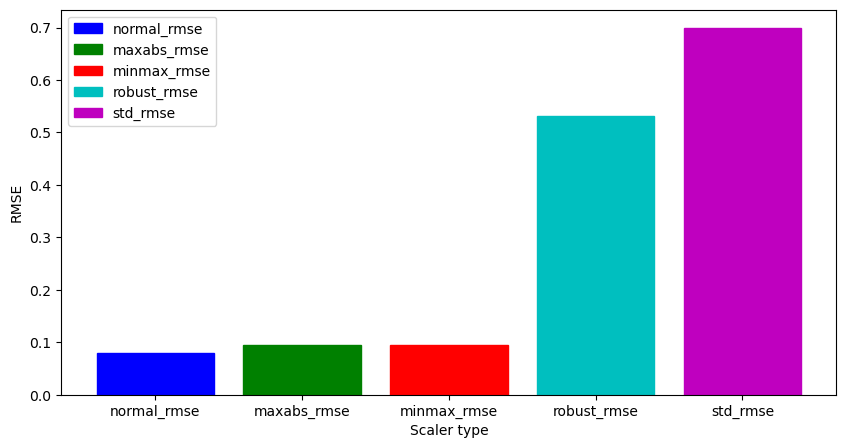

In [22]:
rmse_vals = [ normal_rmse,maxabs_rmse,minmax_rmse,robust_rmse,std_rmse]
import matplotlib.pyplot as plt

# Make somaxe labels. 
labels = ['normal_rmse','maxabs_rmse','minmax_rmse','robust_rmse','std_rmse'] 
  
plt.figure(figsize=(10, 5))
bars = plt.bar(labels, rmse_vals)
colors = ['b', 'g', 'r', 'c', 'm']
for i,bar in enumerate(bars):
    bar.set_color(colors[i])
valuelabel(labels,colors)
plt.xlabel('Scaler type')
plt.ylabel('RMSE')
plt.show()

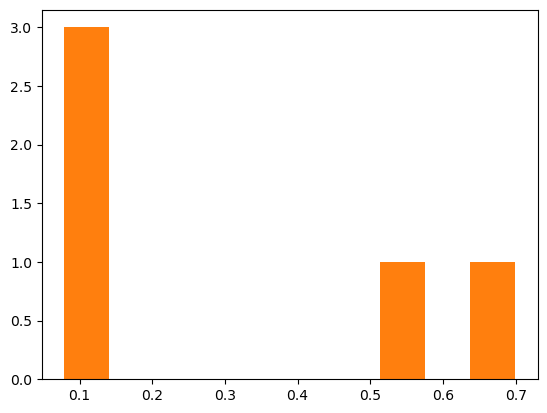

In [24]:
plt.hist(rmse_vals)
plt.show()